In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = load_boston()
x = data.data
y = data.target
columns = data.feature_names

In [3]:
df = pd.DataFrame(x)
df.columns = columns
print('DF shape:', df.shape)
df.head()

DF shape: (506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


# Univariate Outliers

## Applying business understanding or industry insights

Let's say we know that houses older than 95 years are considered too old and unusual and we want to remove such records from the data.

In [4]:
new_df = df.drop(df[df.AGE > 95].index)

In [5]:
print('New shape:', new_df.shape)
new_df.head()

New shape: (395, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## Z Score

In [6]:
from scipy import stats
import numpy as np

In [7]:
z = np.abs(stats.zscore(df))
z

array([[0.41978194, 0.28482986, 1.2879095 , ..., 1.45900038, 0.44105193,
        1.0755623 ],
       [0.41733926, 0.48772236, 0.59338101, ..., 0.30309415, 0.44105193,
        0.49243937],
       [0.41734159, 0.48772236, 0.59338101, ..., 0.30309415, 0.39642699,
        1.2087274 ],
       ...,
       [0.41344658, 0.48772236, 0.11573841, ..., 1.17646583, 0.44105193,
        0.98304761],
       [0.40776407, 0.48772236, 0.11573841, ..., 1.17646583, 0.4032249 ,
        0.86530163],
       [0.41500016, 0.48772236, 0.11573841, ..., 1.17646583, 0.44105193,
        0.66905833]])

In [8]:
threshold = 3
row_inds, col_inds = np.where(z > threshold)
print('Row Indices:\n{}\n\nCol Indices:\n{}'.format(row_inds, col_inds))

Row Indices:
[ 55  56  57 102 141 142 152 154 155 160 162 163 199 200 201 202 203 204
 208 209 210 211 212 216 218 219 220 221 222 225 234 236 256 257 262 269
 273 274 276 277 282 283 283 284 347 351 352 353 353 354 355 356 357 358
 363 364 364 365 367 369 370 372 373 374 374 380 398 404 405 406 410 410
 411 412 412 414 414 415 416 418 418 419 423 424 425 426 427 427 429 431
 436 437 438 445 450 454 455 456 457 466]

Col Indices:
[ 1  1  1 11 12  3  3  3  3  3  3  3  1  1  1  1  1  1  3  3  3  3  3  3
  3  3  3  3  3  5  3  3  1  5  5  3  3  3  3  3  3  1  3  1  1  7  7  1
  7  7  7  3  3  3  3  3  5  5  5  3  3  3 12  5 12  0  0  0  0  5  0 11
 11 11 12  0 12 11 11  0 11 11 11 11 11 11  0 11 11 11 11 11 11 11 11 11
 11 11 11 11]


Observation 55 in column 1 has a Z-Score of higher than threshold (by an absolute value)

In [9]:
new_df = df[(z < 3).all(axis=1)]

In [10]:
print('New shape:', new_df.shape)
new_df.head()

New shape: (415, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## IQR

In [11]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1
print('IQR values:\n\n{}'.format(iqr))

IQR values:

CRIM         3.595038
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
dtype: float64


In [12]:
is_outside_iqr = (df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))
is_outside_iqr.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
new_df = df[~is_outside_iqr.any(axis=1)]

In [14]:
print('New shape:', new_df.shape)
new_df.head()

New shape: (274, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


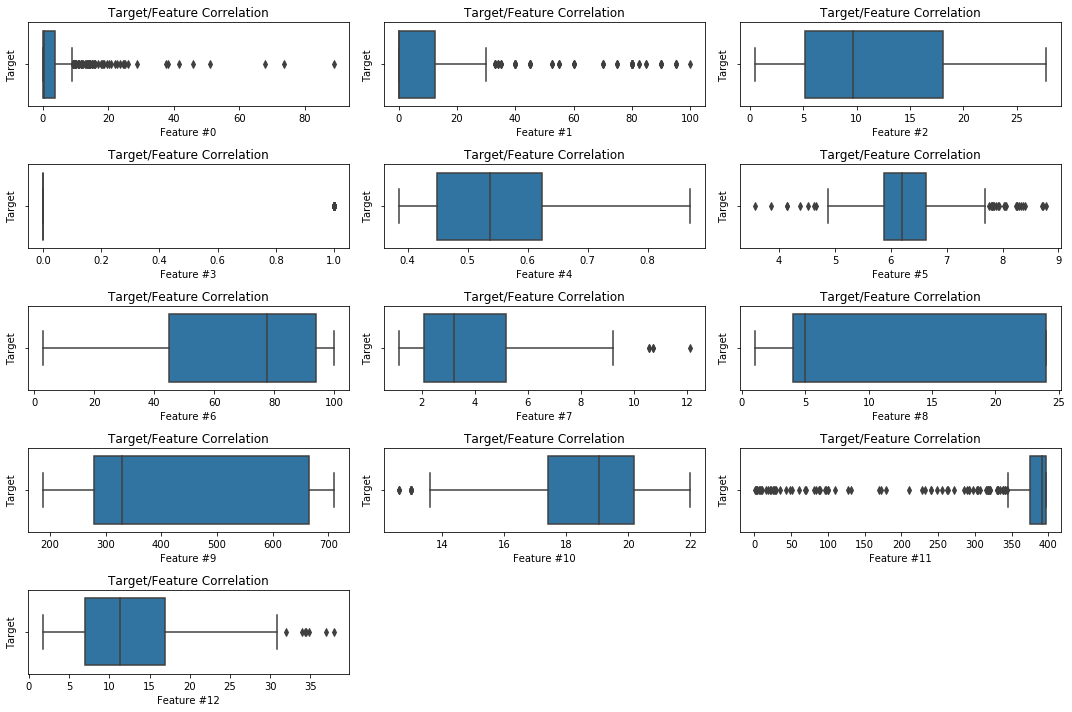

In [15]:
plt.figure(figsize=(15, 10))

N_COLS = 3
N_ROWS = df.shape[1] // N_COLS
extra_row = 1 if df.shape[1] % N_COLS else 0

for i in range(N_ROWS * N_COLS + extra_row):
    ax = plt.subplot(N_ROWS + extra_row, N_COLS, i+1) # i+1 because it should start with 1
    sns.boxplot(x=df.iloc[:,i])
    
    ax.set_title('Target/Feature Correlation')
    
    ax.set_xlabel('Feature #{}'.format(i))
    ax.set_ylabel('Target')
        
plt.tight_layout()